# Libraries

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# Image

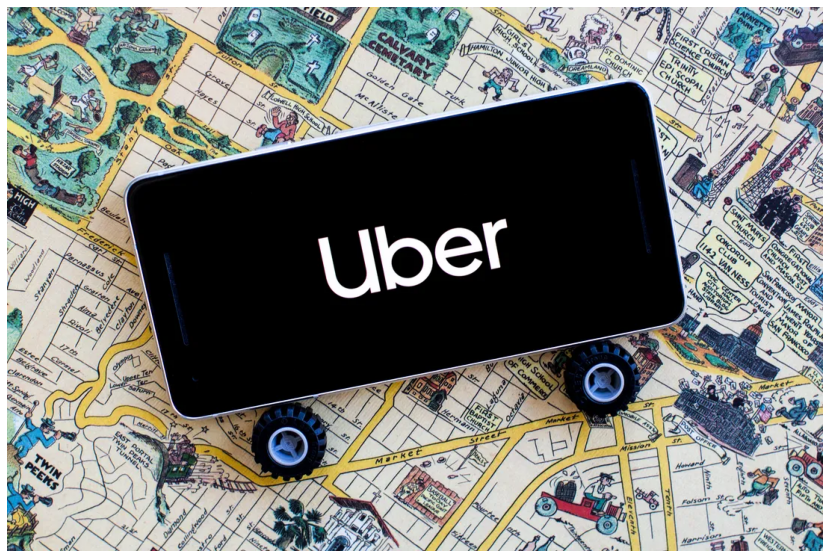

In [115]:
img=mpimg.imread('uber-logo-map-1.png')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(img)

# Dataset

In [116]:
df=pd.read_csv("Uber Request Data.csv")

In [117]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [118]:
len(df["Request id"].unique())

6745

In [119]:
df.shape

(6745, 6)

In [120]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [121]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [123]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [124]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [125]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [126]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [128]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [130]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [131]:
req_hour=df["Request timestamp"].dt.hour

In [132]:
len(req_hour)

6745

In [133]:
df["req_hour"]=req_hour
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [134]:
req_day=df["Request timestamp"].dt.day

In [135]:
df["req_day"]=req_day
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


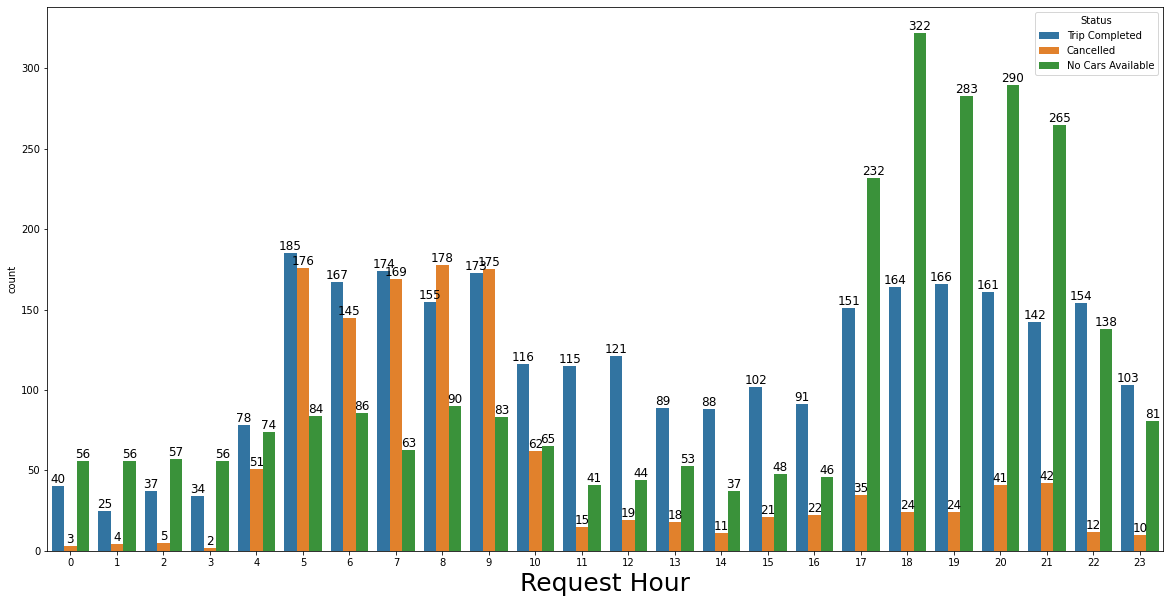

In [136]:
plt.figure(figsize = (20, 10))

sns.countplot(x="req_hour", data=df, hue="Status")
plt.xlabel('Request Hour', fontsize=25)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

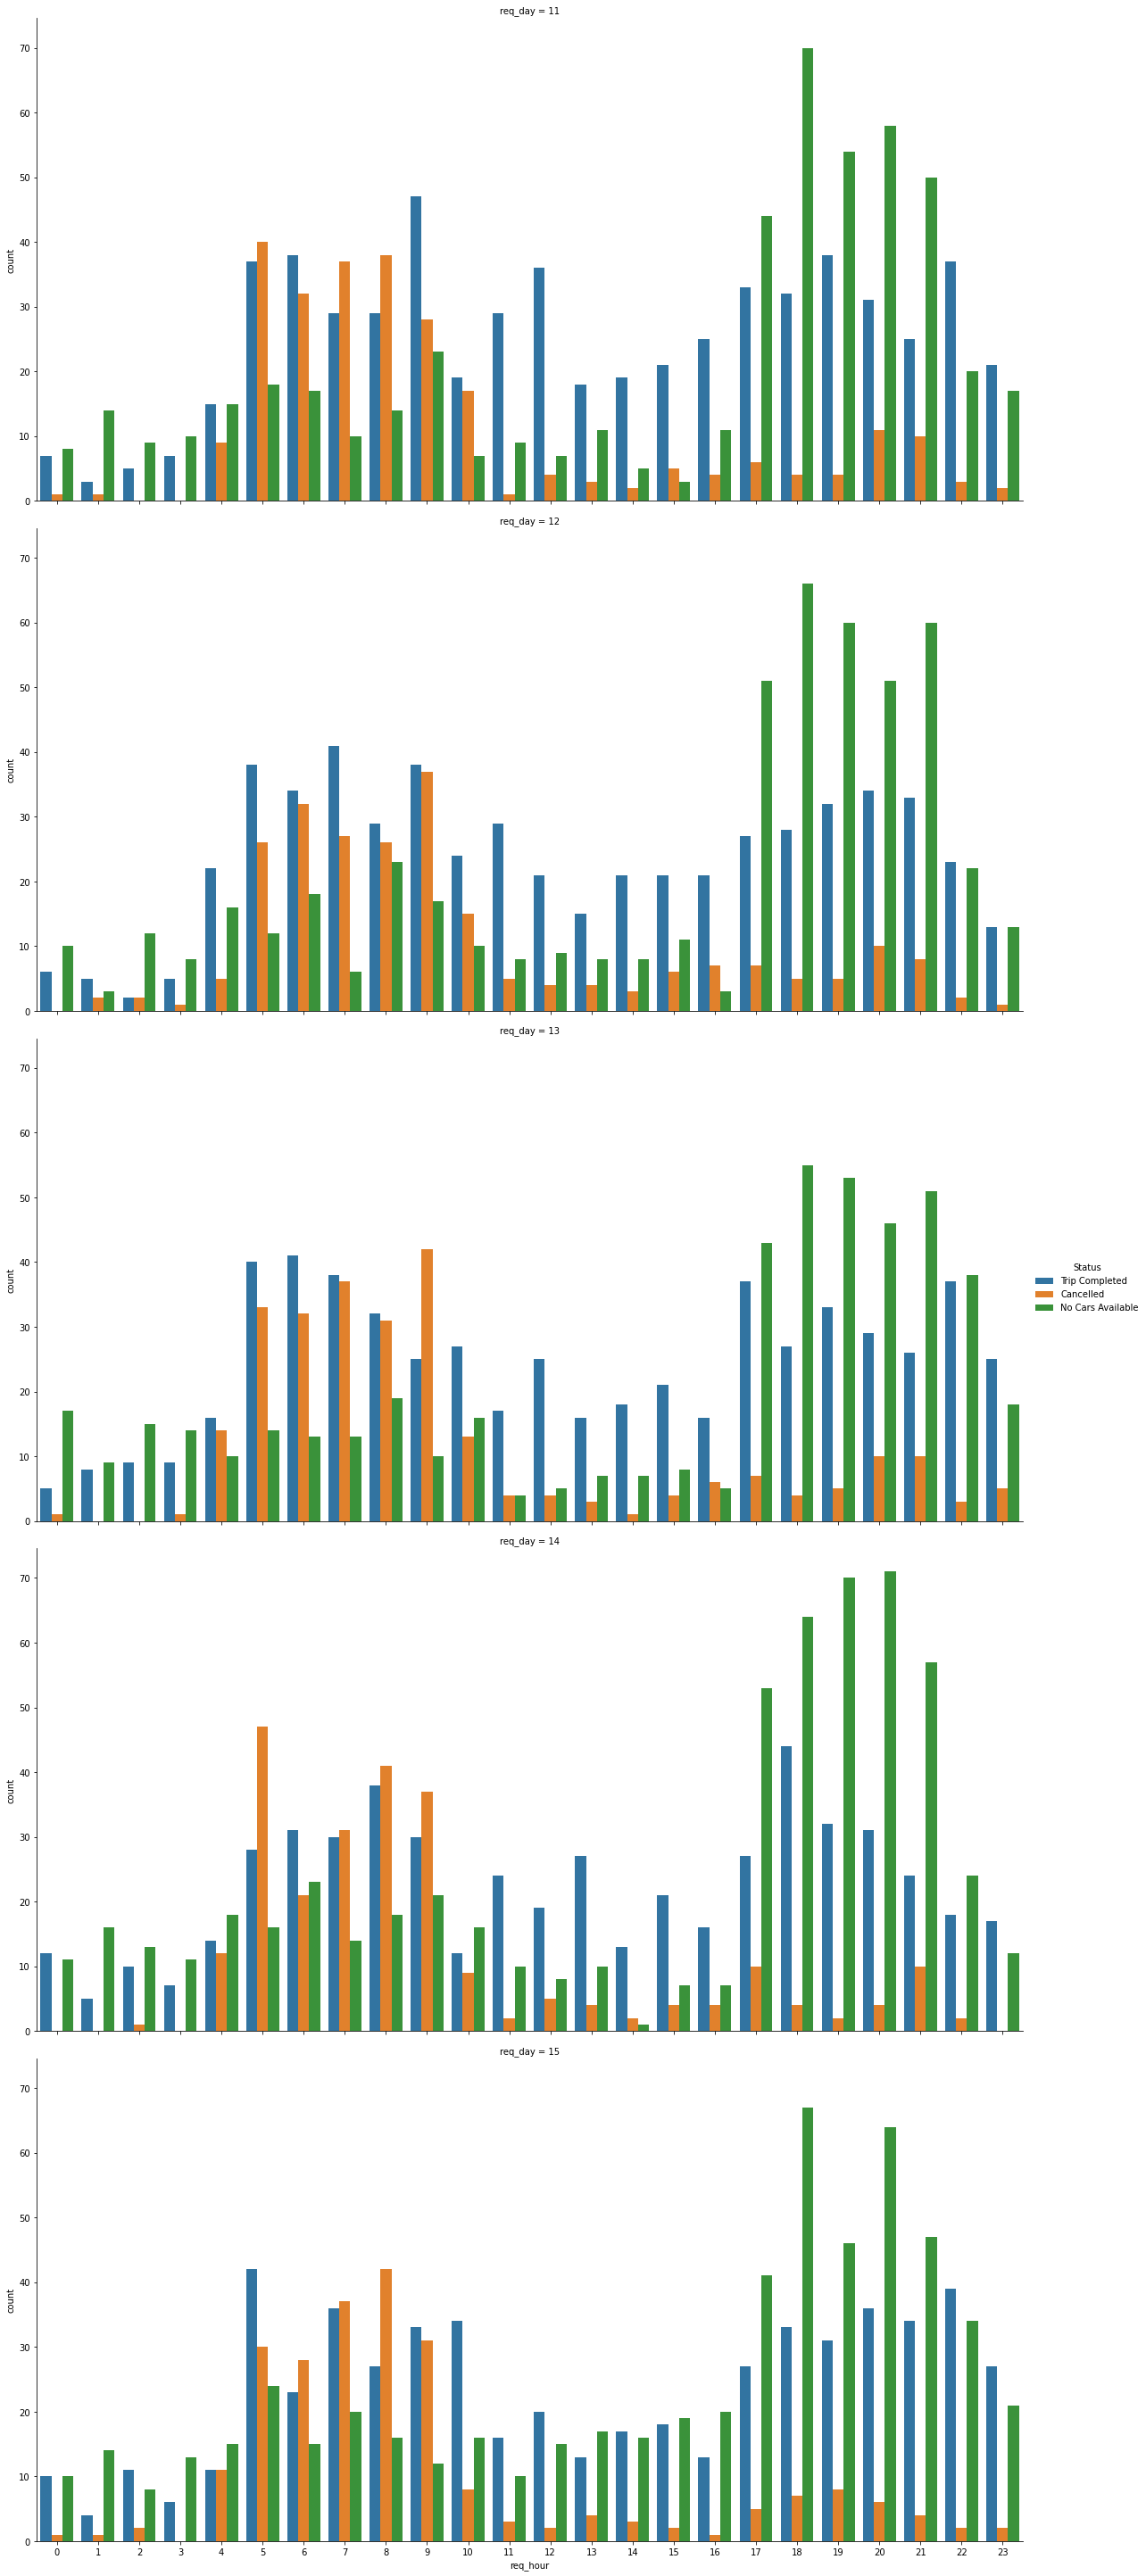

In [174]:
sns.factorplot(x="req_hour", data=df, row="req_day", hue="Status", kind="count", size=8, aspect=2)
plt.show()

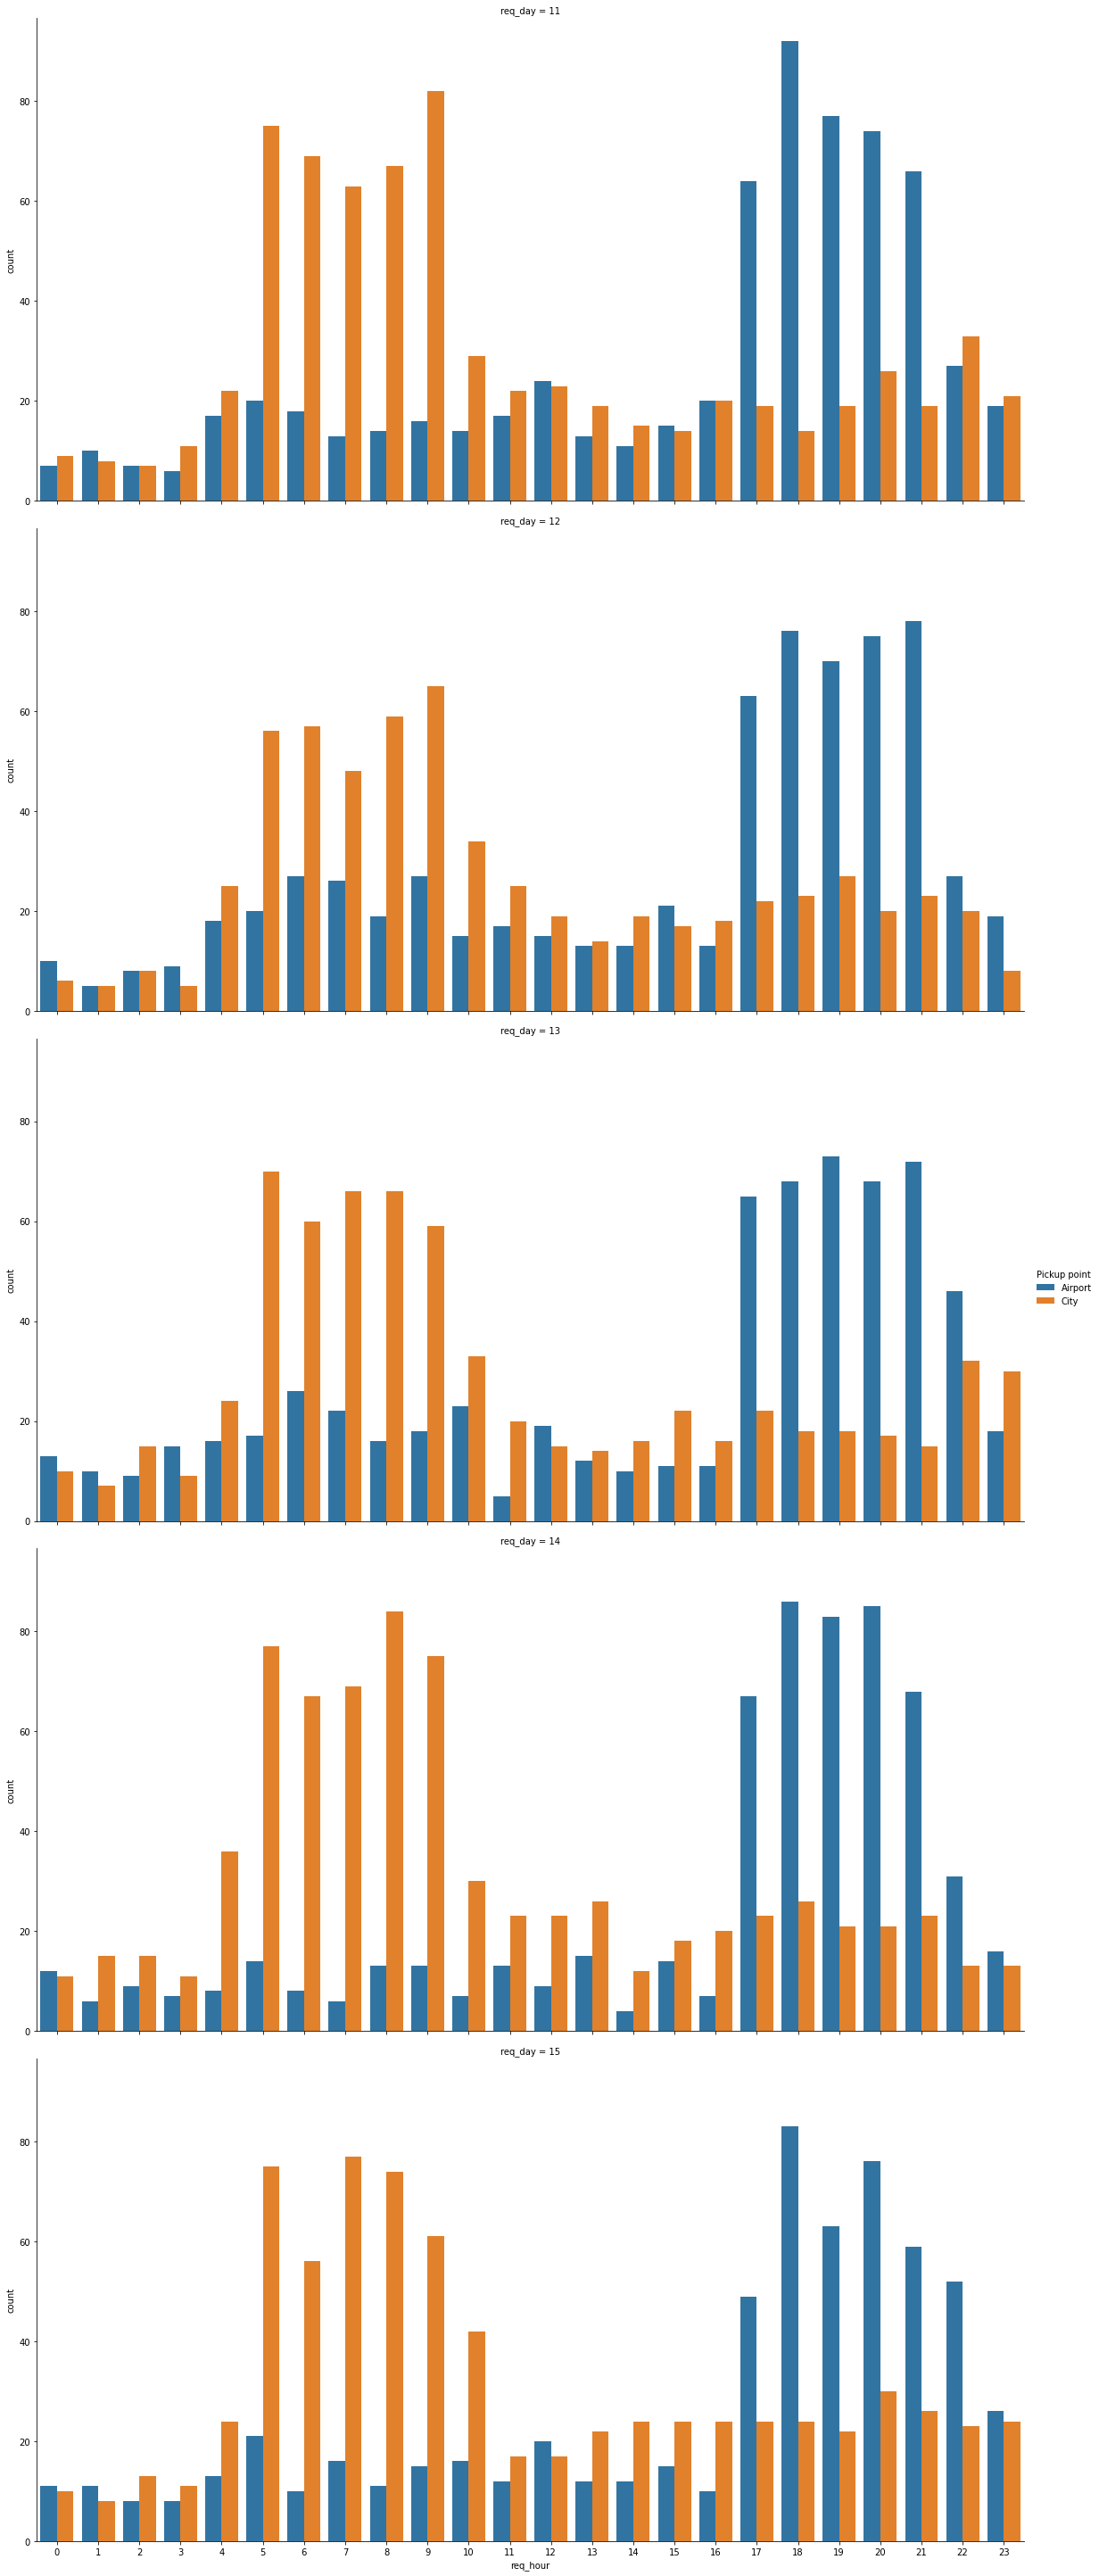

In [175]:
sns.factorplot(x="req_hour", data=df,row="req_day", hue="Pickup point", kind="count", size=8, aspect=2)
plt.show()

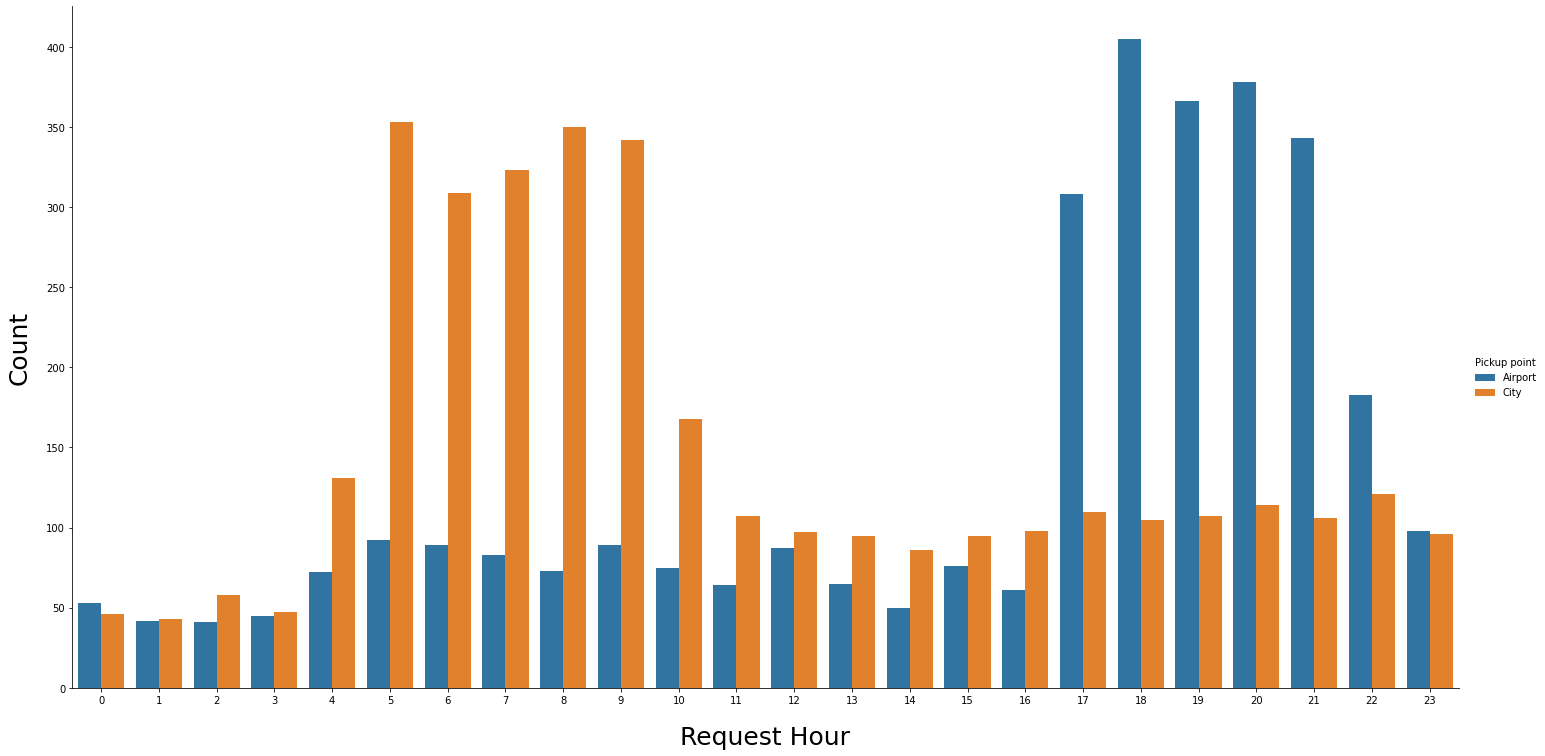

In [139]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count", size=10, aspect=2)
plt.xlabel('Request Hour', fontsize=25, labelpad=20)
plt.ylabel('Count', fontsize=25, labelpad=15)
plt.show()

In [140]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [141]:
df["Time_Slot"]=0

In [142]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [143]:
#<5           "Pre_morning"
#5<=x<10   == "Morning Rush"
#10<=x<17     'Day_time'
#17<=x<22     "Evening rush"
#else         "Late night"

In [144]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [145]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [146]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

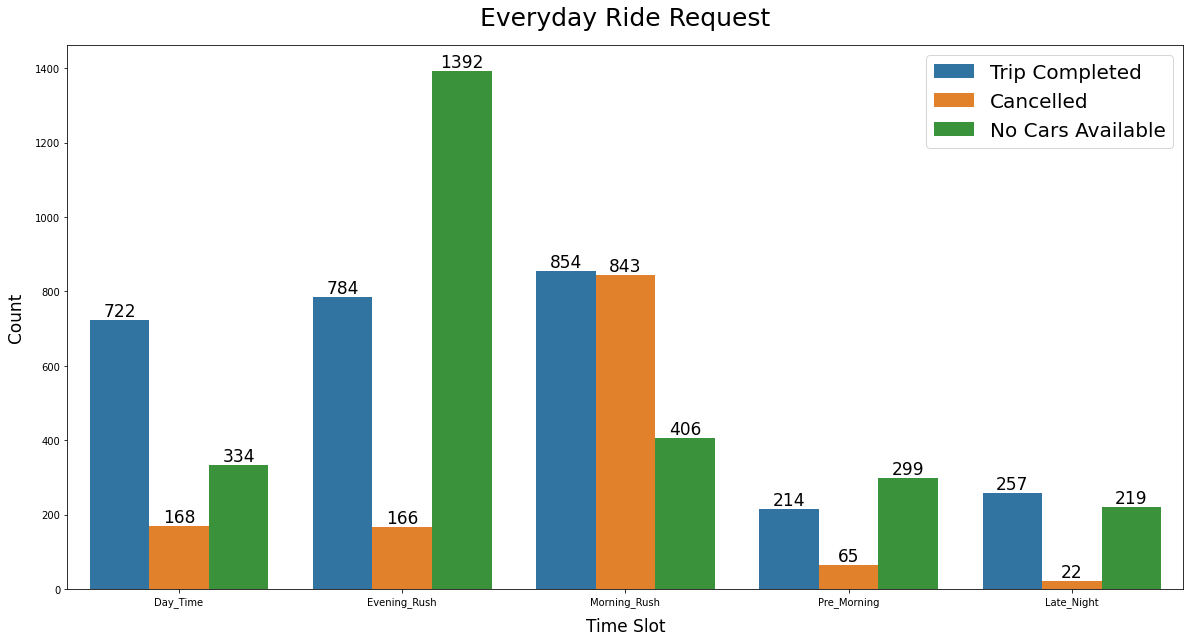

In [147]:
plt.figure(figsize=(20, 10))

sns.countplot(x="Time_Slot", hue="Status", data=df)
plt.title('Everyday Ride Request', fontsize=25, pad=20)
plt.xlabel('Time Slot', fontsize=17, labelpad=10)
plt.ylabel('Count', fontsize=17, labelpad=10)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), fontsize=17, ha='center', va='bottom')

plt.legend(prop={"size":20})
plt.show()

In [148]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


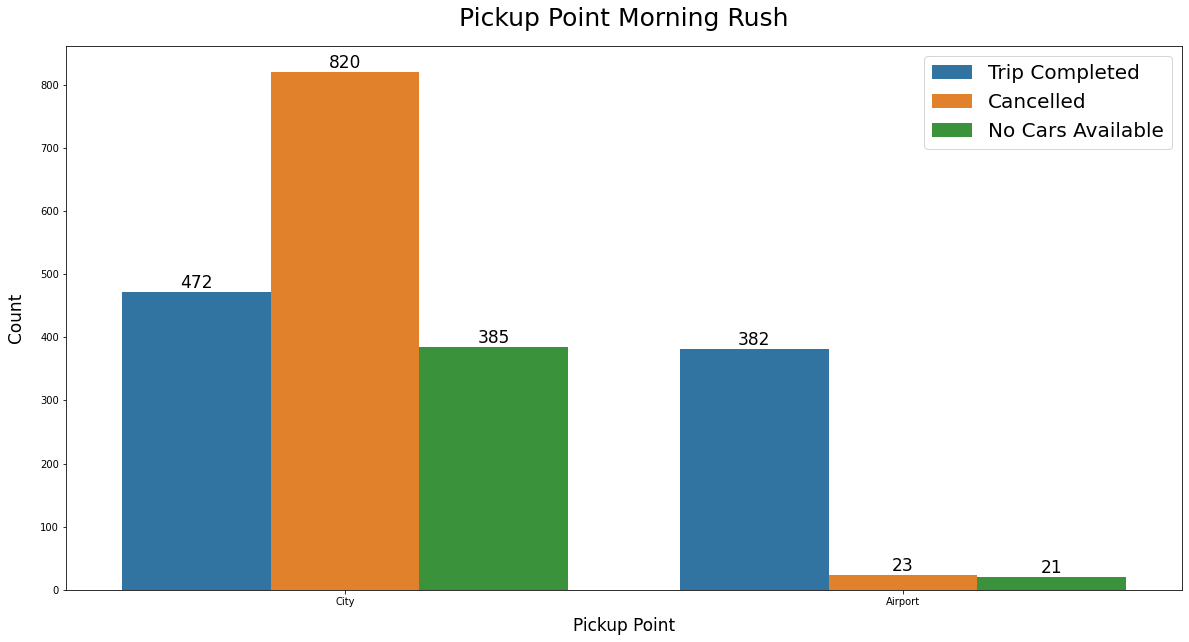

In [149]:
plt.figure(figsize=(20, 10))

sns.countplot(x="Pickup point", hue="Status", data=df_morning_rush)
plt.title('Pickup Point Morning Rush', fontsize=25, pad=20)
plt.xlabel('Pickup Point', fontsize=17, labelpad=10)
plt.ylabel('Count', fontsize=17, labelpad=15)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), fontsize=17, ha='center', va='bottom')

plt.legend(prop={"size":20})
plt.show()

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [150]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2909,1462,Airport,23.0,Cancelled,2016-07-12 05:01:00,NaT,5,12,Morning_Rush
2910,196,Airport,24.0,Cancelled,2016-07-11 06:07:00,NaT,6,11,Morning_Rush
2944,5847,Airport,31.0,Cancelled,2016-07-15 09:05:38,NaT,9,15,Morning_Rush
3130,2844,Airport,74.0,Cancelled,2016-07-13 05:28:12,NaT,5,13,Morning_Rush
3157,5806,Airport,81.0,Cancelled,2016-07-15 08:46:33,NaT,8,15,Morning_Rush
3202,3018,Airport,92.0,Cancelled,2016-07-13 07:27:44,NaT,7,13,Morning_Rush
3254,5854,Airport,103.0,Cancelled,2016-07-15 09:09:32,NaT,9,15,Morning_Rush
3315,174,Airport,119.0,Cancelled,2016-07-11 05:44:00,NaT,5,11,Morning_Rush
3349,1776,Airport,128.0,Cancelled,2016-07-12 09:02:00,NaT,9,12,Morning_Rush


In [151]:
print('Total Cancelled Trip in Airport (Morning Rush) : ',df_airport_cancelled.shape[0])

Total Cancelled Trip in Airport (Morning Rush) :  23


In [152]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [153]:
print('Total Cancelled Trip in City (Morning Rush) : ', df_city_cancelled.shape[0])

Total Cancelled Trip in City (Morning Rush) :  820


# Supply and demand in Morning Rush

In [154]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [155]:
(df_morning_rush["Pickup point"]=="City").value_counts()

True     1677
False     426
Name: Pickup point, dtype: int64

In [156]:
total_request_city = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]
print('Total Number of Request in City           (Morning Rush)  : ', total_request_city)
print('-'*65)

trip_completed_city = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]
print('Total Number of Trip Completed in City    (Morning Rush)  :  ', trip_completed_city)
print('-'*65)

total_request_airport = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]
print('Total Number of Request in Airport        (Morning Rush)  :  ', total_request_airport)
print('-'*65)

trip_completed_airport = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]
print('Total Number of Trip Completed in Airport (Morning Rush)  :  ', trip_completed_airport)

Total Number of Request in City           (Morning Rush)  :  1677
-----------------------------------------------------------------
Total Number of Trip Completed in City    (Morning Rush)  :   472
-----------------------------------------------------------------
Total Number of Request in Airport        (Morning Rush)  :   426
-----------------------------------------------------------------
Total Number of Trip Completed in Airport (Morning Rush)  :   382


# Supply and Demand for Evening Rush

In [157]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']
df_evening_rush.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
6457,6244,Airport,NaN,No Cars Available,2016-07-15 17:46:24,NaT,17,15,Evening_Rush
5435,3714,Airport,NaN,No Cars Available,2016-07-13 19:53:41,NaT,19,13,Evening_Rush
4540,1242,Airport,NaN,No Cars Available,2016-07-11 21:36:00,NaT,21,11,Evening_Rush
501,4997,City,51.0,Trip Completed,2016-07-14 18:57:20,2016-07-14 19:41:29,18,14,Evening_Rush
464,3555,Airport,48.0,Trip Completed,2016-07-13 18:08:02,2016-07-13 19:07:06,18,13,Evening_Rush


In [158]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
3541,903,City,170.0,Cancelled,2016-07-11 18:14:00,NaT,18,11,Evening_Rush
3447,2150,City,146.0,Cancelled,2016-07-12 17:16:00,NaT,17,12,Evening_Rush
3598,5248,City,183.0,Cancelled,2016-07-14 21:18:23,NaT,21,14,Evening_Rush
3396,3794,City,137.0,Cancelled,2016-07-13 20:54:30,NaT,20,13,Evening_Rush
3041,6208,City,54.0,Cancelled,2016-07-15 17:27:11,NaT,17,15,Evening_Rush


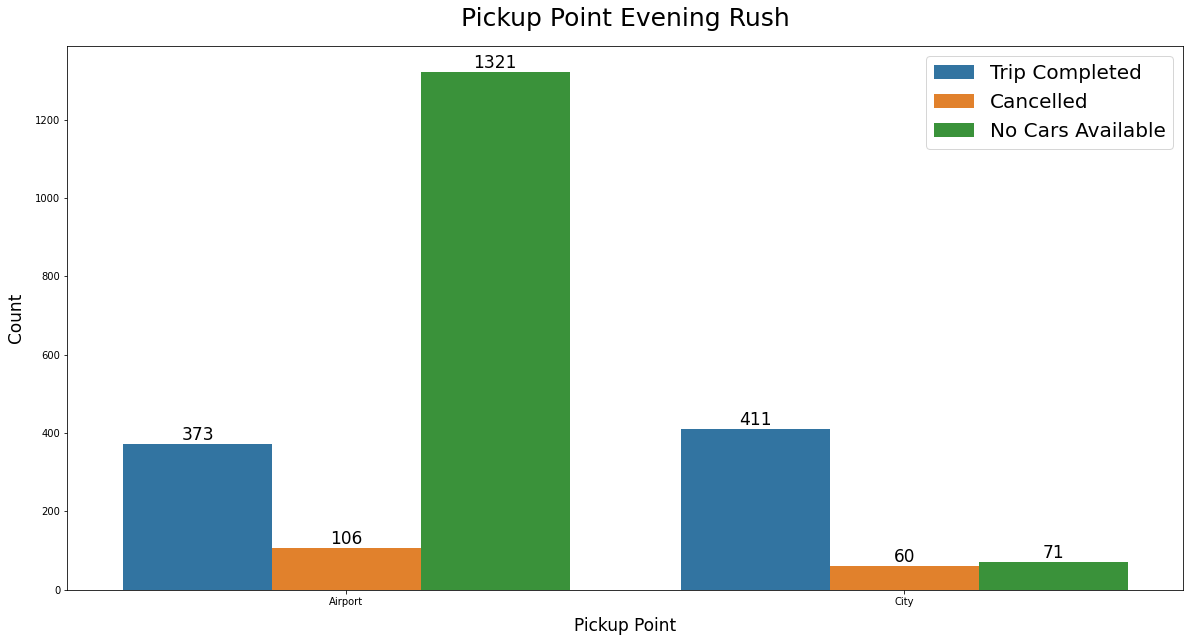

In [159]:
plt.figure(figsize=(20, 10))

sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)
plt.title('Pickup Point Evening Rush', fontsize=25, pad=20)
plt.xlabel('Pickup Point', fontsize=17, labelpad=10)
plt.ylabel('Count', fontsize=17, labelpad=10)
ax = plt.gca()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2 , i.get_height(), '%d' %int(i.get_height()), fontsize=17, ha='center', va='bottom')

plt.legend(prop={"size":20})
plt.show()

In [160]:
df_city_cancelled.shape[0]

60

In [161]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [162]:
total_request_city_evening=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]
print('Total Number of Request in City           (Evening Rush) :  ', total_request_city_evening)
print('-'*65)

trip_completed_city_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]
print('Total Number of Trip Completed in City    (Evening Rush) :   ', trip_completed_city_evening)
print('-'*65)

total_request_airport_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]
print('The Number of Request in Airport          (Evening Rush) :   ',total_request_airport_evening)
print('-'*65)

trip_completed_airport_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]
print('Total Number of Trip Completed in Airport (Evening Rush) :   ', trip_completed_airport_evening)

Total Number of Request in City           (Evening Rush) :   1800
-----------------------------------------------------------------
Total Number of Trip Completed in City    (Evening Rush) :    373
-----------------------------------------------------------------
The Number of Request in Airport          (Evening Rush) :    542
-----------------------------------------------------------------
Total Number of Trip Completed in Airport (Evening Rush) :    411


# Severity problem at each location by looking at cancellation of cabs in each of the pickup location  (Evening & Morning)

In [163]:
print()

trip_cancelled_city_morning = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]
print('Total Number of Cancellation in City          (Morning Rush) :  ', trip_cancelled_city_morning)
print('-'*68)

trip_cancelled_airport_morning = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]
print('Total Number of Cancellation in Airport       (Morning Rush) :   ', trip_cancelled_airport_morning)
print('-'*68)

notavaiable_cars_city_morning = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]
print('Total Number of Cars Not Available in City    (Morning Rush) :  ', notavaiable_cars_city_morning)
print('-'*68)

notavaiable_cars_airport_morning = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]
print('Total Number of Cars Not Available in Airport (Morning Rush) :   ', notavaiable_cars_airport_morning)
print('-'*68)
print('#'*68)
print('#'*68)
print('-'*68)

trip_cancelled_city_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]
print('Total Number of Cancellation in City          (Evening Rush) :   ', trip_cancelled_city_evening)
print('-'*68)

trip_cancelled_airport_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]
print('Total Number of Cancellation in Airport       (Evening Rush) :  ', trip_cancelled_airport_evening)
print('-'*68)

notavaiable_cars_city_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]
print('Total Number of Cars Not-Available in City    (Evening Rush) :   ', notavaiable_cars_city_evening)
print('-'*68)

notavaiable_cars_airport_evening = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]
print('Total Number of Cars Not-Available in Airport (Evening Rush) : ', notavaiable_cars_airport_evening)


Total Number of Cancellation in City          (Morning Rush) :   820
--------------------------------------------------------------------
Total Number of Cancellation in Airport       (Morning Rush) :    23
--------------------------------------------------------------------
Total Number of Cars Not Available in City    (Morning Rush) :   385
--------------------------------------------------------------------
Total Number of Cars Not Available in Airport (Morning Rush) :    21
--------------------------------------------------------------------
####################################################################
####################################################################
--------------------------------------------------------------------
Total Number of Cancellation in City          (Evening Rush) :    60
--------------------------------------------------------------------
Total Number of Cancellation in Airport       (Evening Rush) :   106
---------------------------------

# Pie Chart Morning

In [164]:
df_morning_city = df.loc[(df['Pickup point']=='City') & (df['Time_Slot']=='Morning_Rush')]
df_morning_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush


In [165]:
df_morning_city_count = pd.DataFrame(df_morning_city['Status'].value_counts())
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [166]:
df_morning_city_count['Status'].values

array([820, 472, 385], dtype=int64)

In [167]:
df_morning_city_count['Status'].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

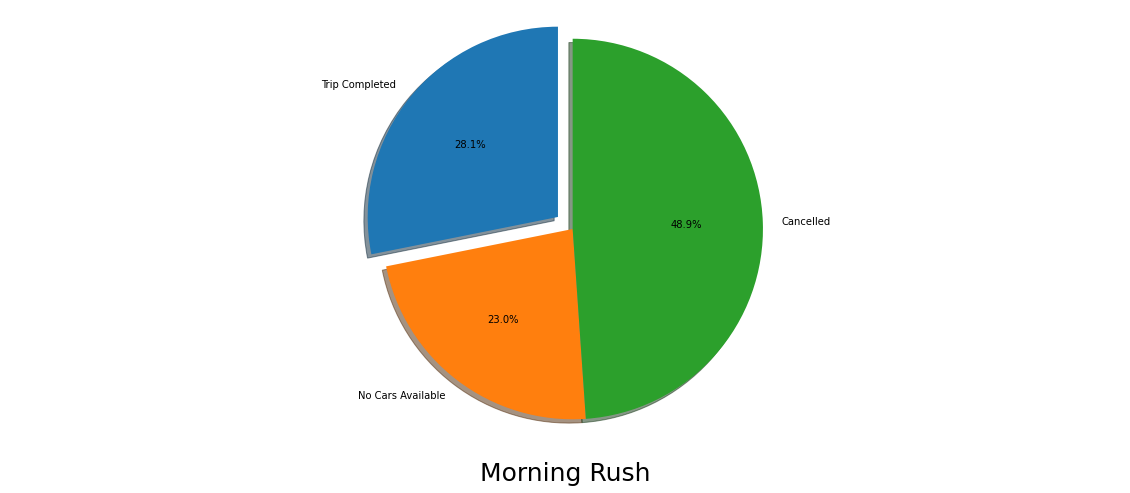

In [168]:
plt.figure(figsize=(20, 8))
labels = 'Trip Completed', 'No Cars Available', 'Cancelled'
sizes = [472, 385, 820]
explode = (0.1, 0, 0)

plt.pie(sizes, labels = labels, explode = explode, shadow=True, startangle=90,autopct='%1.1f%%');
plt.axis('equal')
plt.xlabel('Morning Rush', fontsize=25, labelpad=20)
plt.show()

# Pie Chart Evening

In [169]:
df_evening_city = df.loc[(df['Pickup point']=='City') & (df['Time_Slot']=='Evening_Rush')]
df_evening_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,21,14,Evening_Rush
40,1179,City,5.0,Trip Completed,2016-07-11 20:58:00,2016-07-11 21:45:00,20,11,Evening_Rush
43,2559,City,5.0,Trip Completed,2016-07-12 21:32:00,2016-07-12 22:29:00,21,12,Evening_Rush
52,3882,City,6.0,Trip Completed,2016-07-13 21:53:03,2016-07-13 22:45:24,21,13,Evening_Rush


In [170]:
df_evening_city_count = pd.DataFrame(df_evening_city['Status'].value_counts())
df_evening_city_count

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


In [171]:
df_evening_city_count['Status'].values

array([411,  71,  60], dtype=int64)

In [172]:
df_evening_city_count['Status'].index

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object')

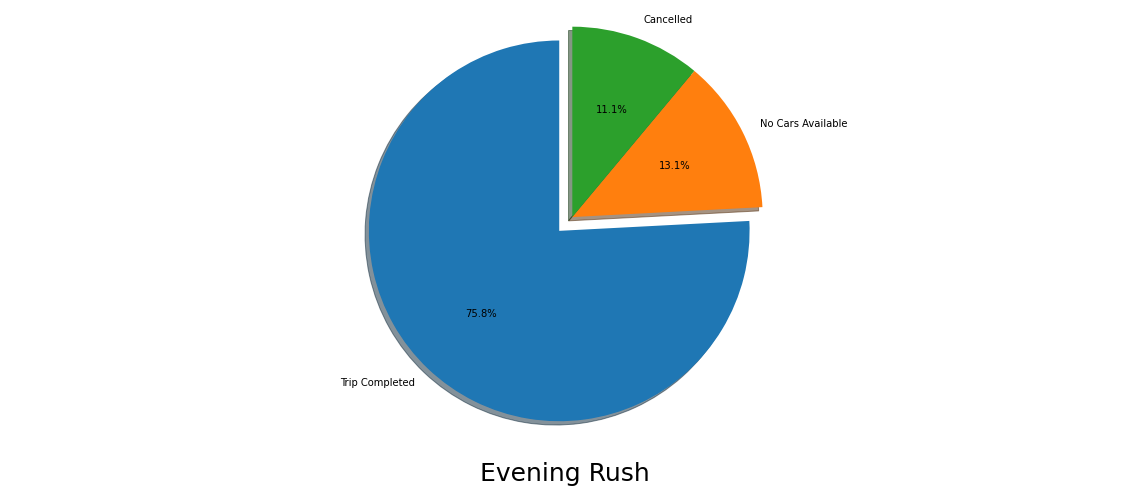

In [173]:
plt.figure(figsize=(20, 8))
labels = 'Trip Completed', 'No Cars Available', 'Cancelled'
sizes = [411, 71, 60]
explode = (0.1, 0, 0)

plt.pie(sizes, labels = labels, explode = explode, shadow=True, startangle=90,autopct='%1.1f%%');
plt.axis('equal')
plt.xlabel('Evening Rush', fontsize=25, labelpad=20)
plt.show()

# Inferences

1. They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure that less number of trips are cancelled. 

2. Uber can pay for the gas mileage of drivers to come back to the city without a ride 

3. Drivers can again be given bonus to complete a trip from the airport in the evening. This will ensure that the supple increases at the airport 

4. Uber can also pay drivers to come without a passenger to the airport 

5. Another way could be to increase licenses of car pooling taxis so that lesser number of cars can serve more passengers